# HICP MIDX - Extract European Countries Data

This notebook extracts HICP (Harmonised Index of Consumer Prices) data for multiple European countries from the compressed Eurostat file.

**Countries included:**
- Italy
- Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)
- Germany
- France
- Spain
- United Kingdom
- Netherlands
- Sweden
- Denmark
- Norway
- Finland
- Switzerland
- Austria
- Belgium
- Portugal

**Filters applied:**
- COICOP: All-items HICP
- Unit: Index, 1996=100 (base year 1996)

**Outputs:**
- CSV file: `data/eurostat/hicp_it_eu.csv`
- Individual country plots: `data/eurostat/hicp_plots/hicp_{country}_plot.png`
- Euro Area dedicated plot: `data/eurostat/hicp_Euro_Area_plot.png`
- Combined comparison plot: `data/eurostat/hicp_all_countries_combined_plot.png`


In [1]:
import pandas as pd
import os

# Change to project root directory
# Find the project root by looking for the 'data' directory
current_dir = os.getcwd()
while not os.path.exists(os.path.join(current_dir, 'data')):
    parent_dir = os.path.dirname(current_dir)
    if parent_dir == current_dir:
        # Reached filesystem root without finding 'data' directory
        raise FileNotFoundError("Could not find project root directory (looking for 'data' folder)")
    current_dir = parent_dir

os.chdir(current_dir)
print(f"Working directory: {os.getcwd()}")

# Check that the file exists
input_file = 'data/eurostat/prc_hicp_midx_linear.csv.gz'
output_file = 'data/eurostat/hicp_it_eu.csv'

if not os.path.exists(input_file):
    raise FileNotFoundError(f"File not found: {input_file}")

print(f"Input file: {input_file}")
print(f"Output file: {output_file}")


Working directory: /workspace
Input file: data/eurostat/prc_hicp_midx_linear.csv.gz
Output file: data/eurostat/hicp_it_eu.csv


In [2]:
# Define the countries to extract
target_countries = [
    'Italy',
    'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)',
    'Germany',
    'France',
    'Spain',
    'United Kingdom',
    'Netherlands',
    'Sweden',
    'Denmark',
    'Norway',
    'Finland',
    'Switzerland',
    'Austria',
    'Belgium',
    'Portugal'
]

# Define the coicop and unit filter
target_coicop = 'All-items HICP'
target_unit = 'Index, 1996=100'  # Use only the 1996 base year

print(f"Countries to extract: {target_countries}")
print(f"COICOP filter: {target_coicop}")
print(f"Unit filter: {target_unit}")


Countries to extract: ['Italy', 'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)', 'Germany', 'France', 'Spain', 'United Kingdom', 'Netherlands', 'Sweden', 'Denmark', 'Norway', 'Finland', 'Switzerland', 'Austria', 'Belgium', 'Portugal']
COICOP filter: All-items HICP
Unit filter: Index, 1996=100


In [3]:
# Read the file efficiently using chunks
# This avoids loading the entire file into memory
chunks = []
chunk_size = 100000  # Read 100k rows at a time

print("Reading file in chunks...")
for i, chunk in enumerate(pd.read_csv(input_file, compression='gzip', chunksize=chunk_size, low_memory=False)):
    # Filter by countries, coicop, and unit (to avoid duplicate entries with different base years)
    filtered_chunk = chunk[
        (chunk['geo'].isin(target_countries)) & 
        (chunk['coicop'] == target_coicop) &
        (chunk['unit'] == target_unit)
    ]
    if not filtered_chunk.empty:
        chunks.append(filtered_chunk)
    
    if (i + 1) % 10 == 0:
        print(f"Processed {i + 1} chunks...")

print(f"Total chunks processed: {i + 1}")


Reading file in chunks...
Processed 10 chunks...
Processed 20 chunks...
Processed 30 chunks...
Processed 40 chunks...
Processed 50 chunks...
Processed 60 chunks...
Processed 70 chunks...
Total chunks processed: 77


In [4]:
# Combine all filtered chunks
if chunks:
    df_filtered = pd.concat(chunks, ignore_index=True)
    print(f"Extracted rows: {len(df_filtered)}")
    print(f"\nFirst extracted data:")
    print(df_filtered.head())
    print(f"\nDataset info:")
    print(df_filtered.info())
else:
    print("No data found for the specified countries!")


Extracted rows: 4953

First extracted data:
                   DATAFLOW        LAST UPDATE     freq             unit  \
0  ESTAT:PRC_HICP_MIDX(1.0)  19/11/25 11:00:00  Monthly  Index, 1996=100   
1  ESTAT:PRC_HICP_MIDX(1.0)  19/11/25 11:00:00  Monthly  Index, 1996=100   
2  ESTAT:PRC_HICP_MIDX(1.0)  19/11/25 11:00:00  Monthly  Index, 1996=100   
3  ESTAT:PRC_HICP_MIDX(1.0)  19/11/25 11:00:00  Monthly  Index, 1996=100   
4  ESTAT:PRC_HICP_MIDX(1.0)  19/11/25 11:00:00  Monthly  Index, 1996=100   

           coicop      geo TIME_PERIOD  OBS_VALUE OBS_FLAG  CONF_STATUS  
0  All-items HICP  Austria     1996-01       99.4      NaN          NaN  
1  All-items HICP  Austria     1996-02       99.7      NaN          NaN  
2  All-items HICP  Austria     1996-03      100.0      NaN          NaN  
3  All-items HICP  Austria     1996-04       99.9      NaN          NaN  
4  All-items HICP  Austria     1996-05       99.8      NaN          NaN  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Ra

In [5]:
# Verify the countries present in the extracted data
if chunks:
    print("Countries present in extracted data:")
    print(df_filtered['geo'].value_counts())


Countries present in extracted data:
geo
Austria                                                                                                          358
Belgium                                                                                                          358
Germany                                                                                                          358
Denmark                                                                                                          358
Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)    358
Spain                                                                                                            358
Finland                                                                                                          358
France                                                                                                           358
Italy                  

## Plots

Generate individual plots for each country and a combined plot with all countries.


In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert TIME_PERIOD to datetime
df_filtered['DATE'] = pd.to_datetime(df_filtered['TIME_PERIOD'])

# Create a short name mapping for better plot titles
country_short_names = {
    'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)': 'Euro Area',
    'Italy': 'Italy',
    'Germany': 'Germany',
    'France': 'France',
    'Spain': 'Spain',
    'United Kingdom': 'United Kingdom',
    'Netherlands': 'Netherlands',
    'Sweden': 'Sweden',
    'Denmark': 'Denmark',
    'Norway': 'Norway',
    'Finland': 'Finland',
    'Switzerland': 'Switzerland',
    'Austria': 'Austria',
    'Belgium': 'Belgium',
    'Portugal': 'Portugal'
}

# Get unique countries
countries = df_filtered['geo'].unique()
print(f"Plotting {len(countries)} countries individually...")


Plotting 14 countries individually...


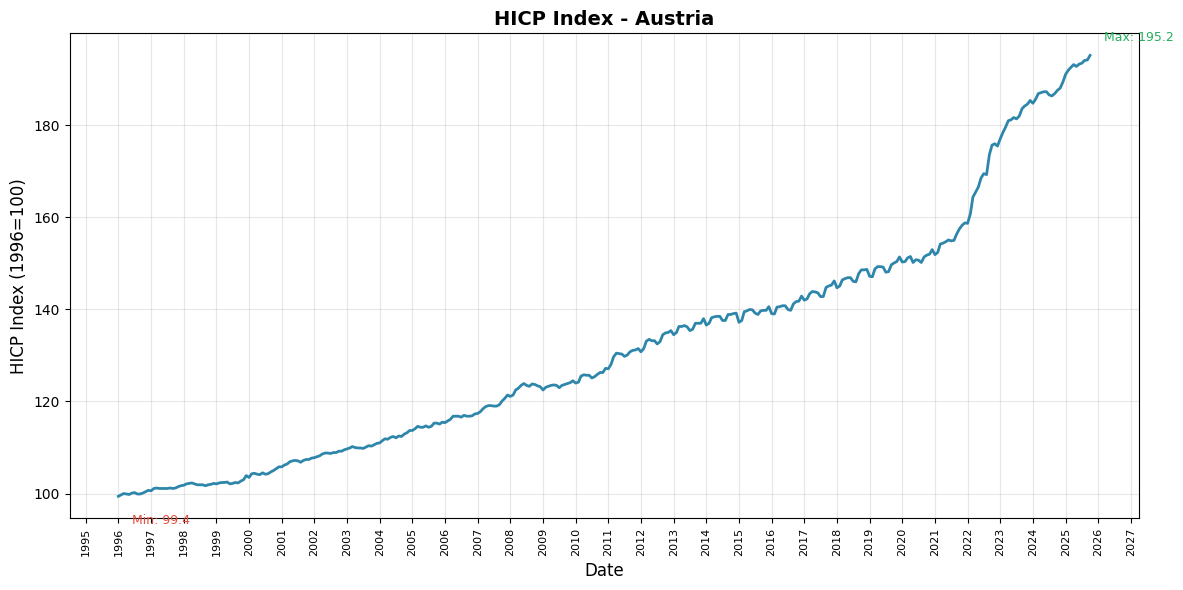

Saved: data/eurostat/hicp_plots/hicp_Austria_plot.png


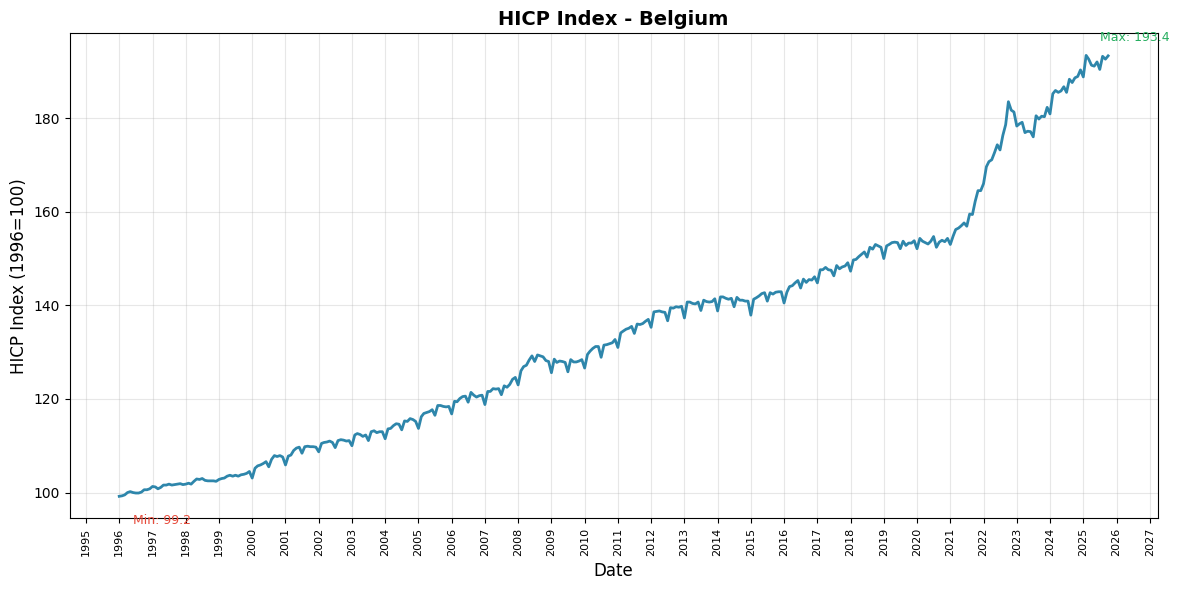

Saved: data/eurostat/hicp_plots/hicp_Belgium_plot.png


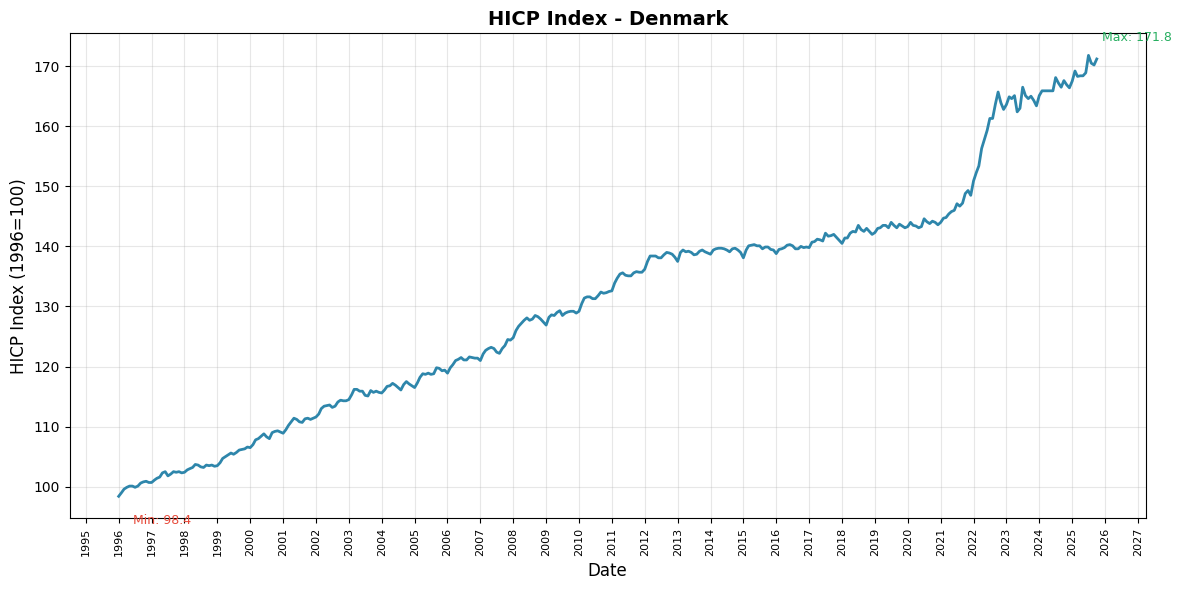

Saved: data/eurostat/hicp_plots/hicp_Denmark_plot.png


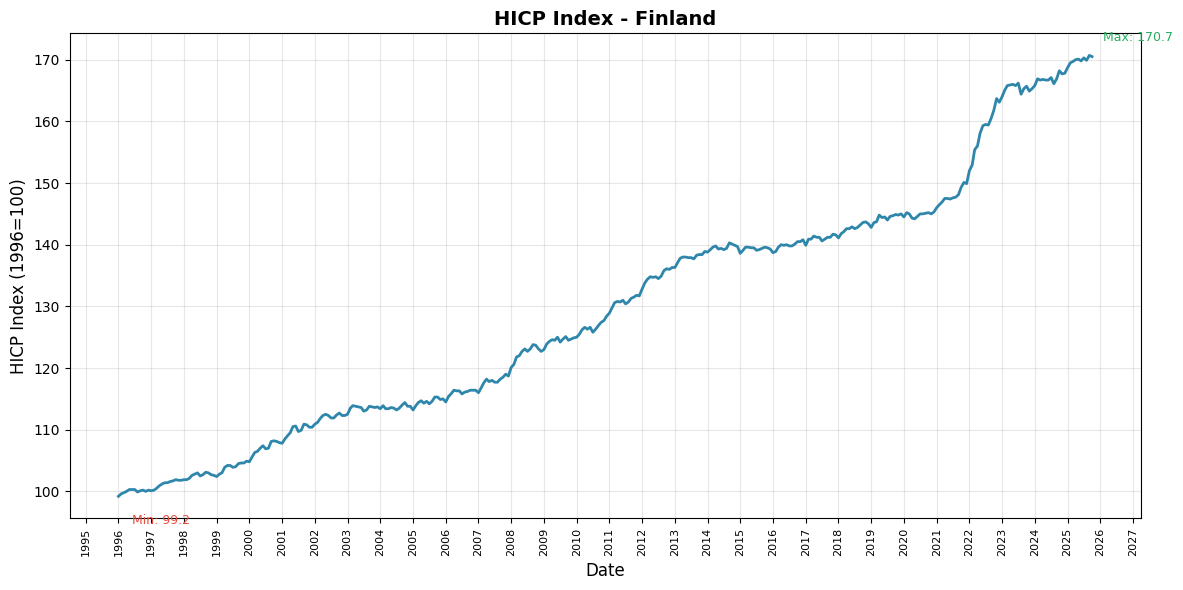

Saved: data/eurostat/hicp_plots/hicp_Finland_plot.png


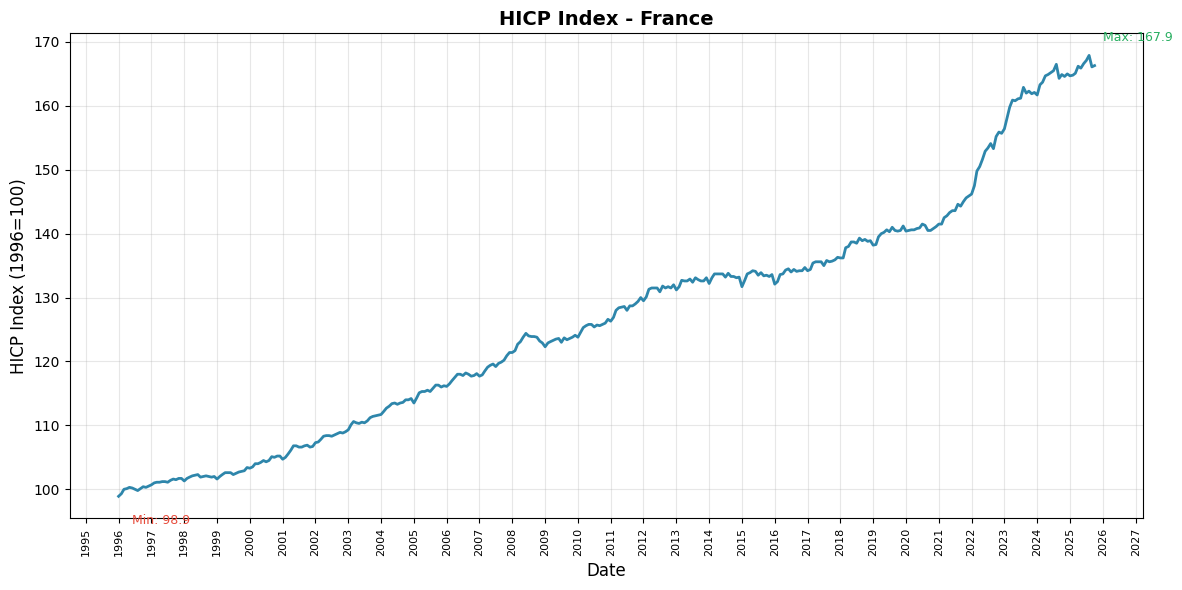

Saved: data/eurostat/hicp_plots/hicp_France_plot.png


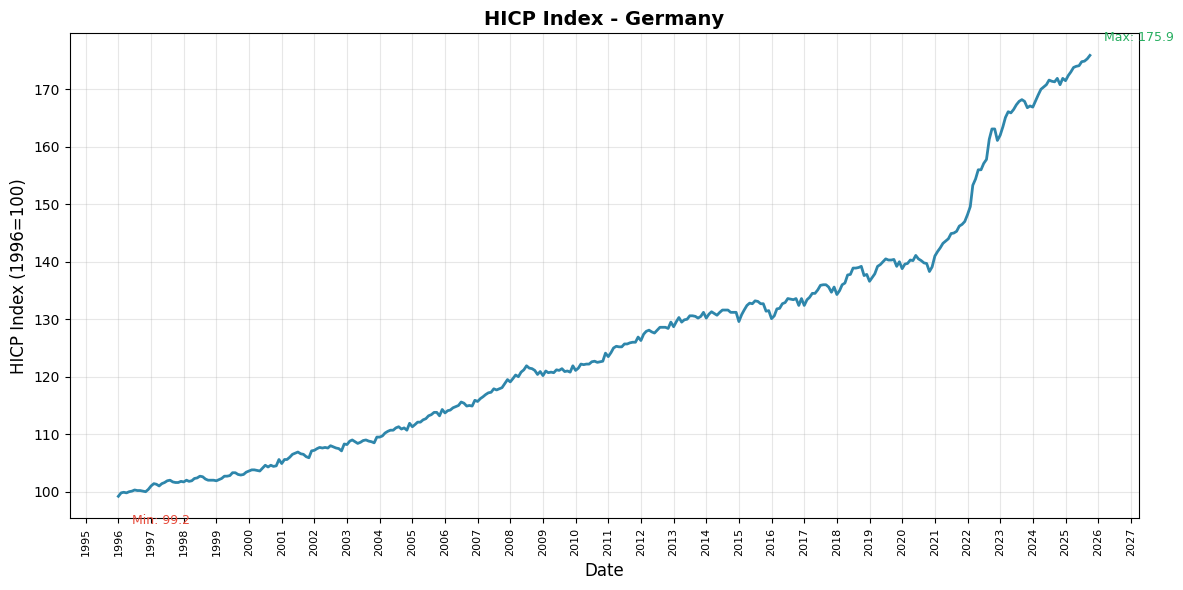

Saved: data/eurostat/hicp_plots/hicp_Germany_plot.png


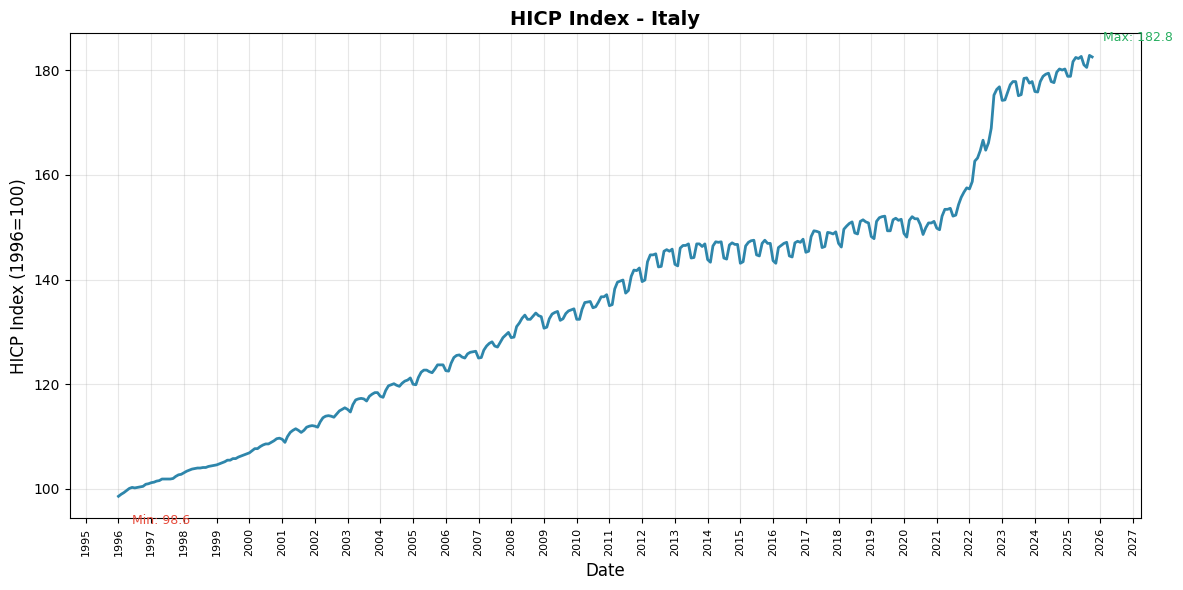

Saved: data/eurostat/hicp_plots/hicp_Italy_plot.png


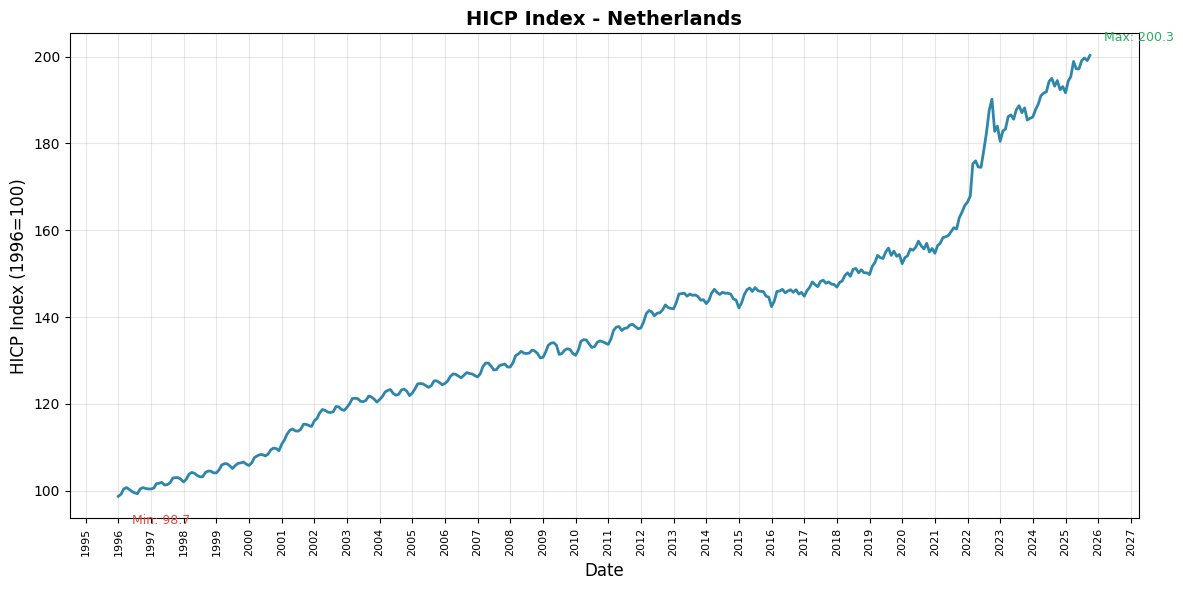

Saved: data/eurostat/hicp_plots/hicp_Netherlands_plot.png


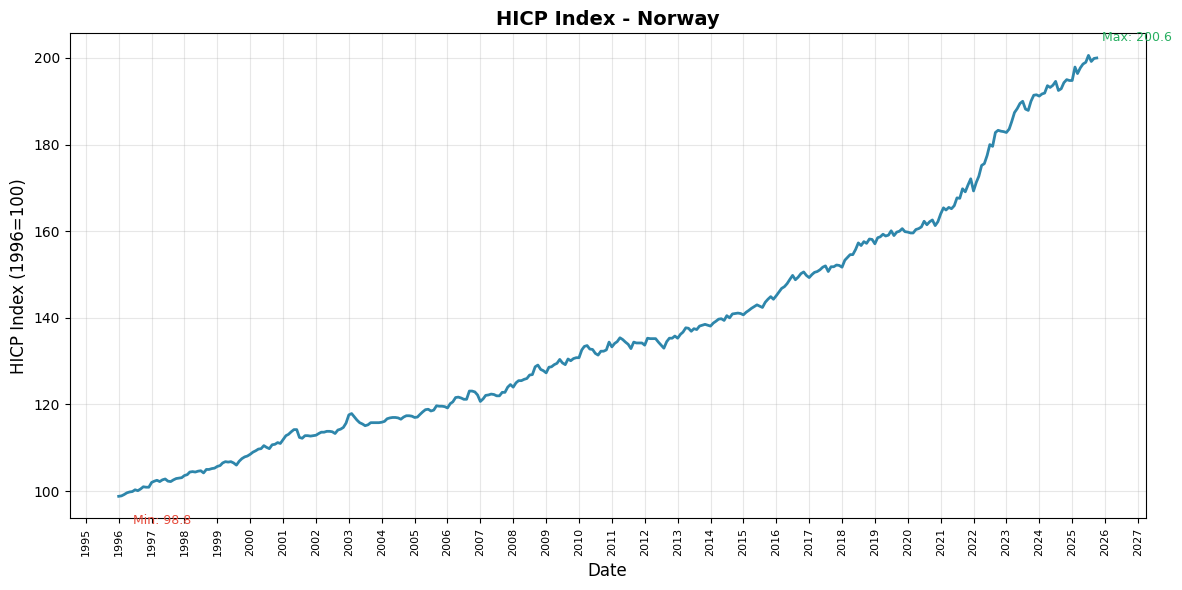

Saved: data/eurostat/hicp_plots/hicp_Norway_plot.png


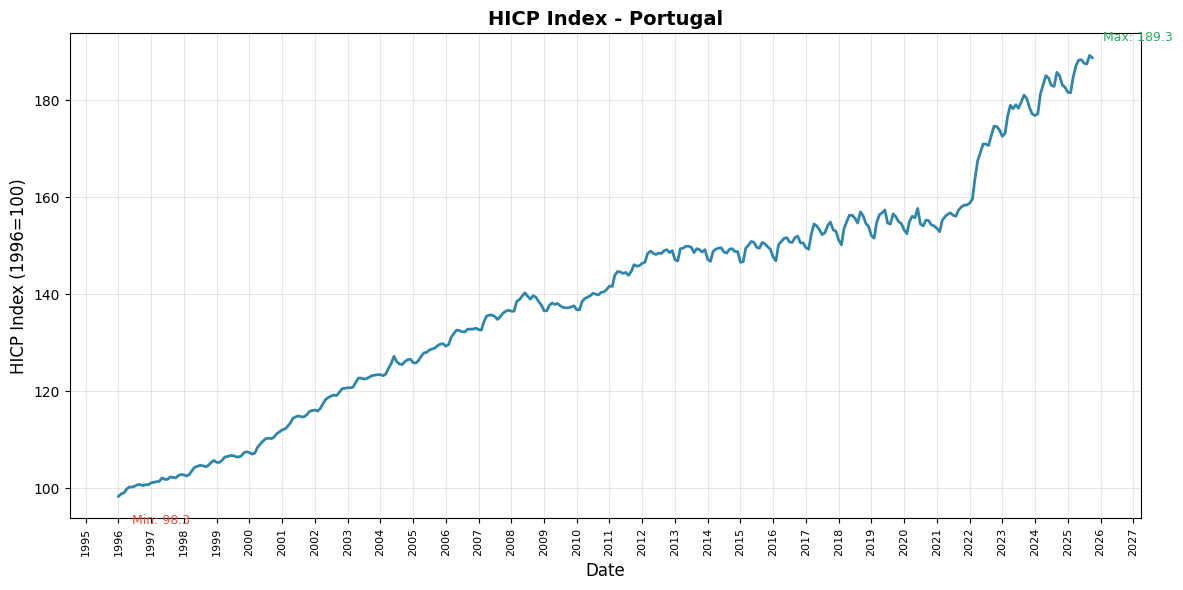

Saved: data/eurostat/hicp_plots/hicp_Portugal_plot.png


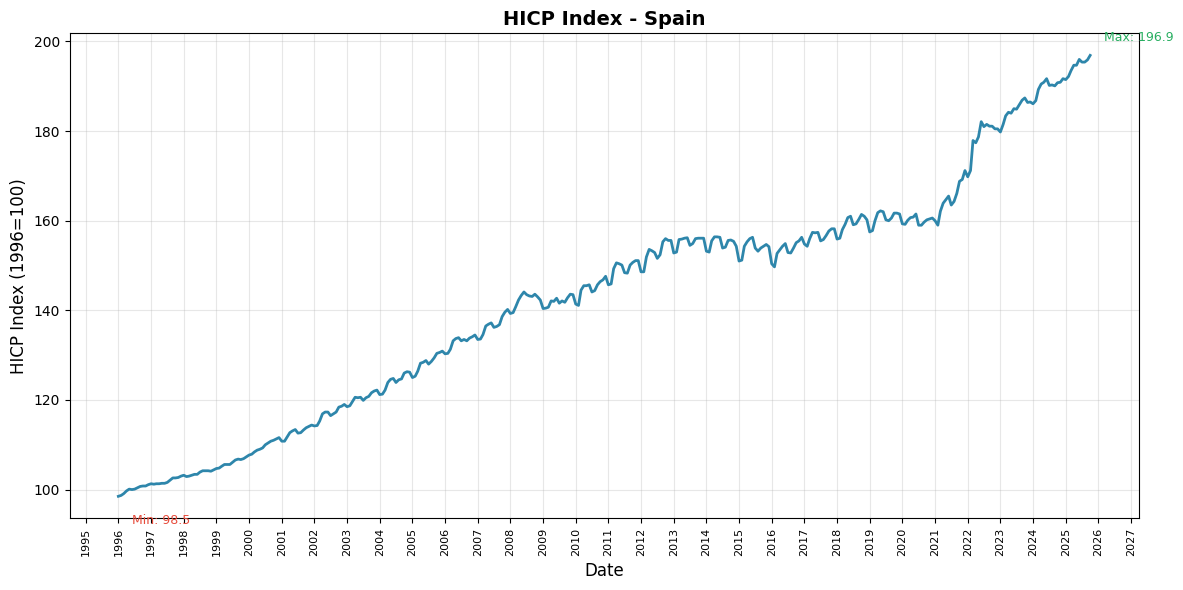

Saved: data/eurostat/hicp_plots/hicp_Spain_plot.png


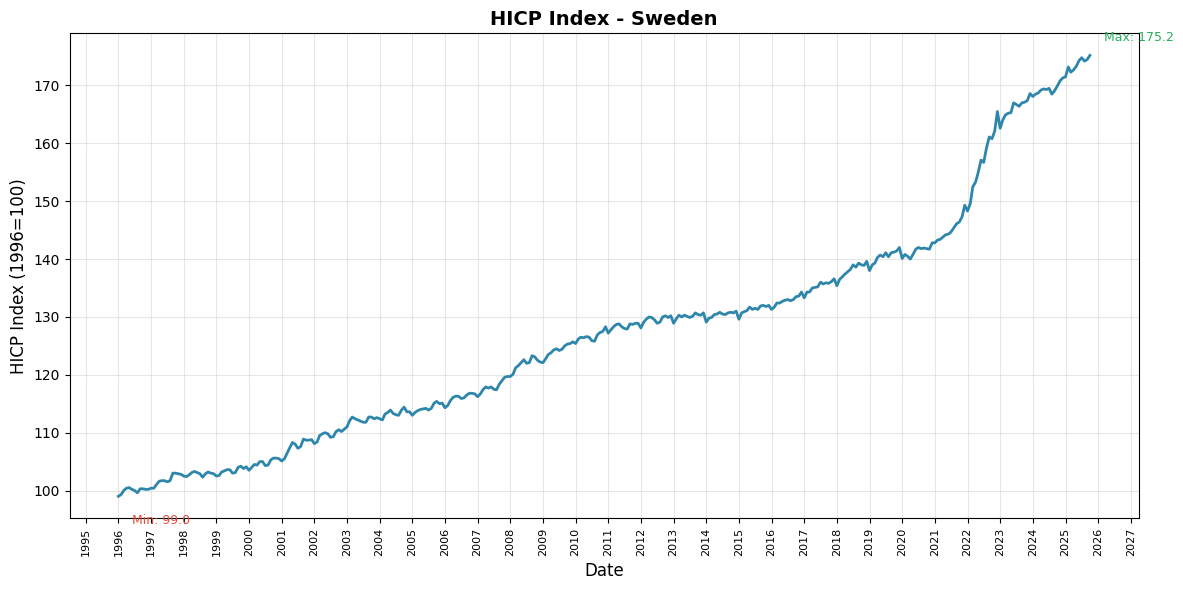

Saved: data/eurostat/hicp_plots/hicp_Sweden_plot.png


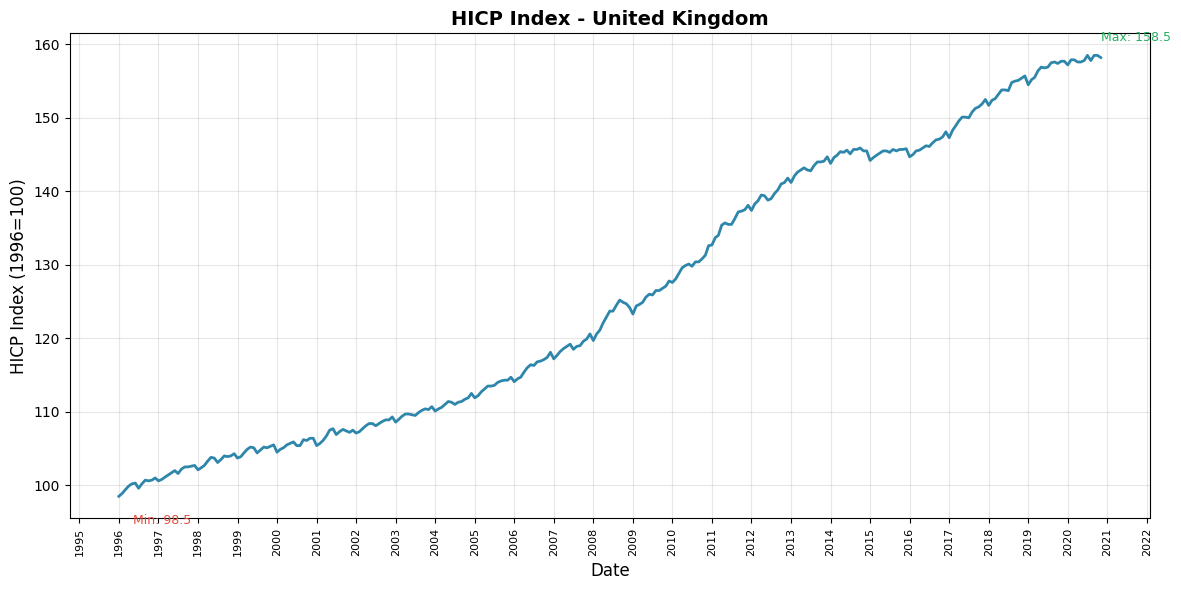

Saved: data/eurostat/hicp_plots/hicp_United_Kingdom_plot.png

All individual plots saved to: data/eurostat/hicp_plots/


In [7]:
# Individual plots for each country - one separate plot per country (excluding Euro Area, plotted separately)
output_dir = 'data/eurostat/hicp_plots'
os.makedirs(output_dir, exist_ok=True)

# Euro area key to exclude from this loop (it has a dedicated plot)
euro_area_key = 'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)'

for country in sorted(countries, key=lambda x: country_short_names.get(x, x)):
    # Skip Euro Area - it has a dedicated plot
    if country == euro_area_key:
        continue
    
    country_data = df_filtered[df_filtered['geo'] == country].sort_values('DATE')
    short_name = country_short_names.get(country, country)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(country_data['DATE'], country_data['OBS_VALUE'], linewidth=2, color='#2E86AB')
    ax.set_title(f'HICP Index - {short_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('HICP Index (1996=100)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)
    
    # Add min/max annotations
    min_val = country_data['OBS_VALUE'].min()
    max_val = country_data['OBS_VALUE'].max()
    min_date = country_data.loc[country_data['OBS_VALUE'].idxmin(), 'DATE']
    max_date = country_data.loc[country_data['OBS_VALUE'].idxmax(), 'DATE']
    
    ax.annotate(f'Min: {min_val:.1f}', xy=(min_date, min_val), xytext=(10, -20),
                textcoords='offset points', fontsize=9, color='#E74C3C')
    ax.annotate(f'Max: {max_val:.1f}', xy=(max_date, max_val), xytext=(10, 10),
                textcoords='offset points', fontsize=9, color='#27AE60')
    
    plt.tight_layout()
    
    # Save with clean filename
    filename = short_name.replace(' ', '_').replace('/', '_')
    filepath = f'{output_dir}/hicp_{filename}_plot.png'
    plt.savefig(filepath, dpi=150, bbox_inches='tight')
    plt.show()
    print(f"Saved: {filepath}")

print(f"\nAll individual plots saved to: {output_dir}/")


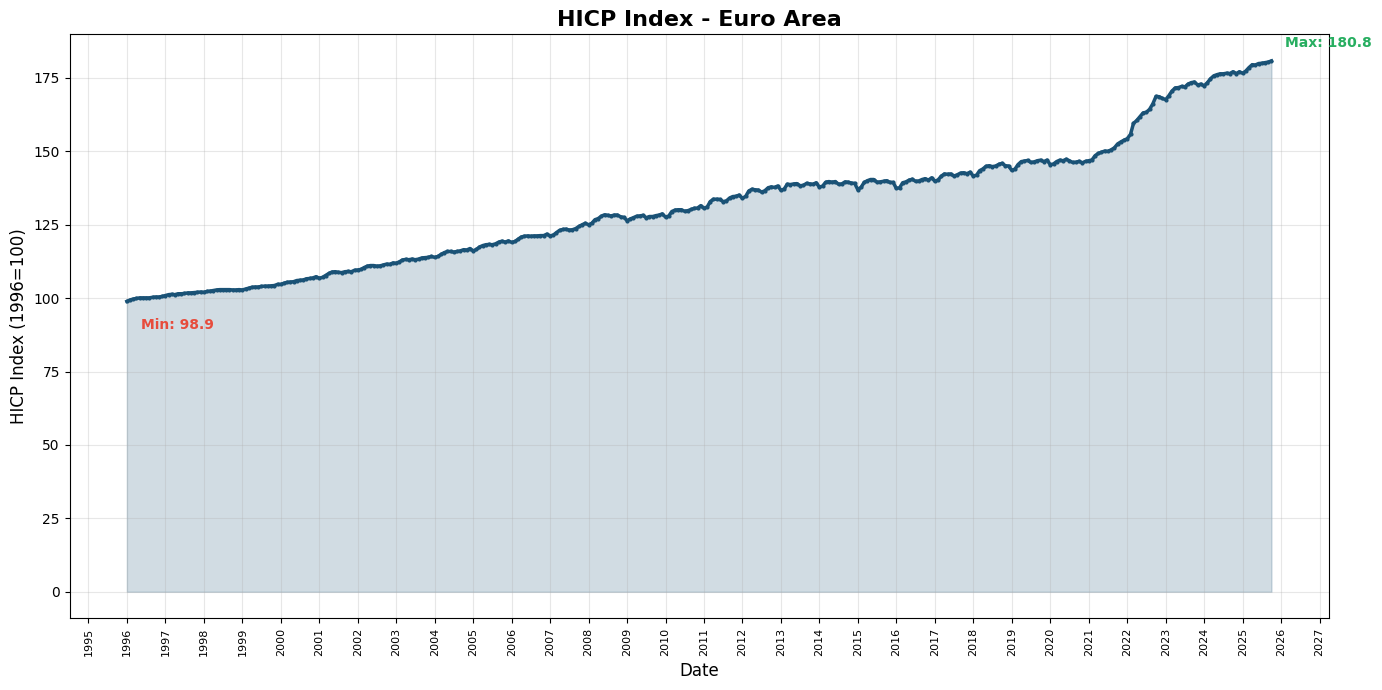

Euro Area plot saved to: data/eurostat/hicp_Euro_Area_plot.png


In [8]:
# Dedicated Euro Area plot
euro_area_key = 'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)'
euro_data = df_filtered[df_filtered['geo'] == euro_area_key].sort_values('DATE')

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(euro_data['DATE'], euro_data['OBS_VALUE'], linewidth=2.5, color='#1a5276', marker='o', markersize=2)
ax.fill_between(euro_data['DATE'], euro_data['OBS_VALUE'], alpha=0.2, color='#1a5276')

ax.set_title('HICP Index - Euro Area', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('HICP Index (1996=100)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)

# Add min/max annotations
min_val = euro_data['OBS_VALUE'].min()
max_val = euro_data['OBS_VALUE'].max()
min_date = euro_data.loc[euro_data['OBS_VALUE'].idxmin(), 'DATE']
max_date = euro_data.loc[euro_data['OBS_VALUE'].idxmax(), 'DATE']

ax.annotate(f'Min: {min_val:.1f}', xy=(min_date, min_val), xytext=(10, -20),
            textcoords='offset points', fontsize=10, color='#E74C3C', fontweight='bold')
ax.annotate(f'Max: {max_val:.1f}', xy=(max_date, max_val), xytext=(10, 10),
            textcoords='offset points', fontsize=10, color='#27AE60', fontweight='bold')

plt.tight_layout()
plt.savefig('data/eurostat/hicp_Euro_Area_plot.png', dpi=150, bbox_inches='tight')
plt.show()
print("Euro Area plot saved to: data/eurostat/hicp_Euro_Area_plot.png")


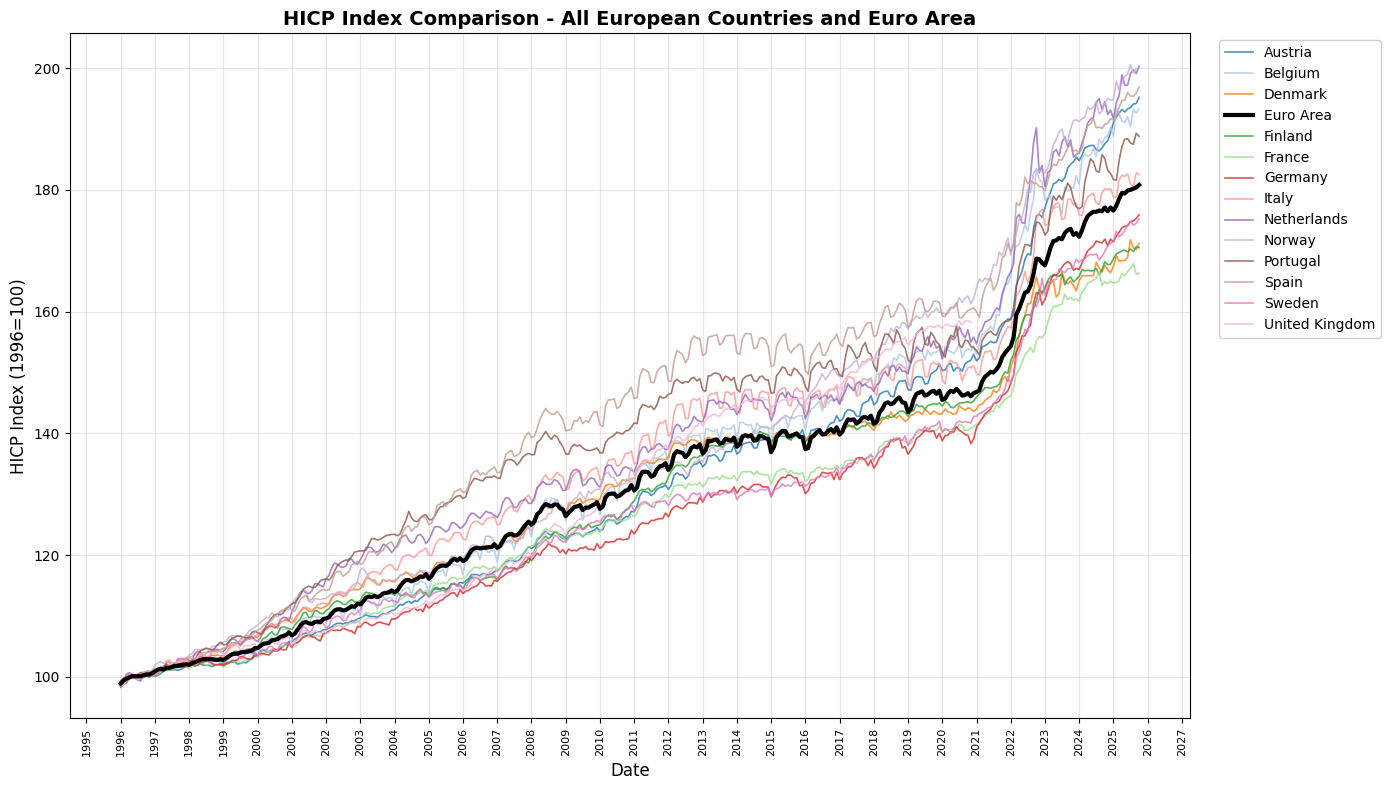

Combined plot saved to: data/eurostat/hicp_all_countries_combined_plot.png


In [9]:
# Combined plot with all countries and Euro area
fig, ax = plt.subplots(figsize=(14, 8))

# Color palette for different countries
colors = plt.cm.tab20(range(len(countries)))

# Euro area key for highlighting
euro_area_key = 'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)'

# Plot each country
for i, country in enumerate(sorted(countries, key=lambda x: country_short_names.get(x, x))):
    country_data = df_filtered[df_filtered['geo'] == country].sort_values('DATE')
    
    # Highlight Euro area with thicker line
    if country == euro_area_key:
        ax.plot(country_data['DATE'], country_data['OBS_VALUE'], 
                linewidth=3, color='black', label=country_short_names.get(country, country), zorder=10)
    else:
        ax.plot(country_data['DATE'], country_data['OBS_VALUE'], 
                linewidth=1.2, color=colors[i], label=country_short_names.get(country, country), alpha=0.8)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('HICP Index (1996=100)', fontsize=12)
ax.set_title('HICP Index Comparison - All European Countries and Euro Area', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)

# Legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.savefig('data/eurostat/hicp_all_countries_combined_plot.png', dpi=150, bbox_inches='tight')
plt.show()
print("Combined plot saved to: data/eurostat/hicp_all_countries_combined_plot.png")


In [10]:
# Save the filtered file
if chunks:
    # Create directory if it doesn't exist
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    
    # Save the CSV
    df_filtered.to_csv(output_file, index=False)
    print(f"\nFile saved successfully: {output_file}")
    print(f"Dimensions: {len(df_filtered)} rows, {len(df_filtered.columns)} columns")
else:
    print("No data to save!")



File saved successfully: data/eurostat/hicp_it_eu.csv
Dimensions: 4953 rows, 11 columns
